### Rep.3 - 회귀 문제 풀기 (201845092 이정윤)
    [문제 1] KNN을 이용한 농어(Perch)의 무게를 예측 문제에서, k에 따른 훈련과 테스트 R2값의 변화 그래프를 그리고 최적의 k를 찾아 출력하시오.

### 데이터 수집 및 정제

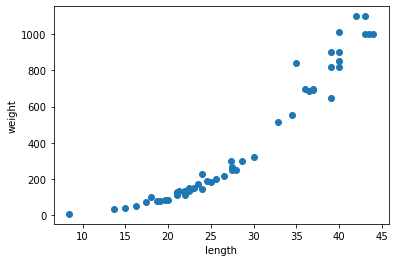

In [206]:
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
    21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
    23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
    27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
    39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
    44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
    115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
    150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
    218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
    556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
    850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
    1000.0])

# 데이터 시각화
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

train, test 분리

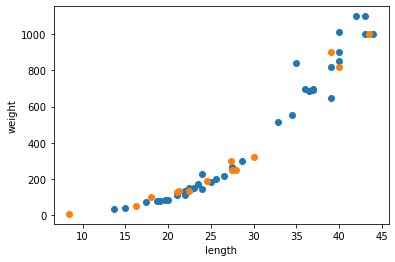

In [207]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
  perch_length, perch_weight, random_state=42)

# 데이터 시각화
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 모델 생성 및 평가

K값에 따른 KNN 모델 생성

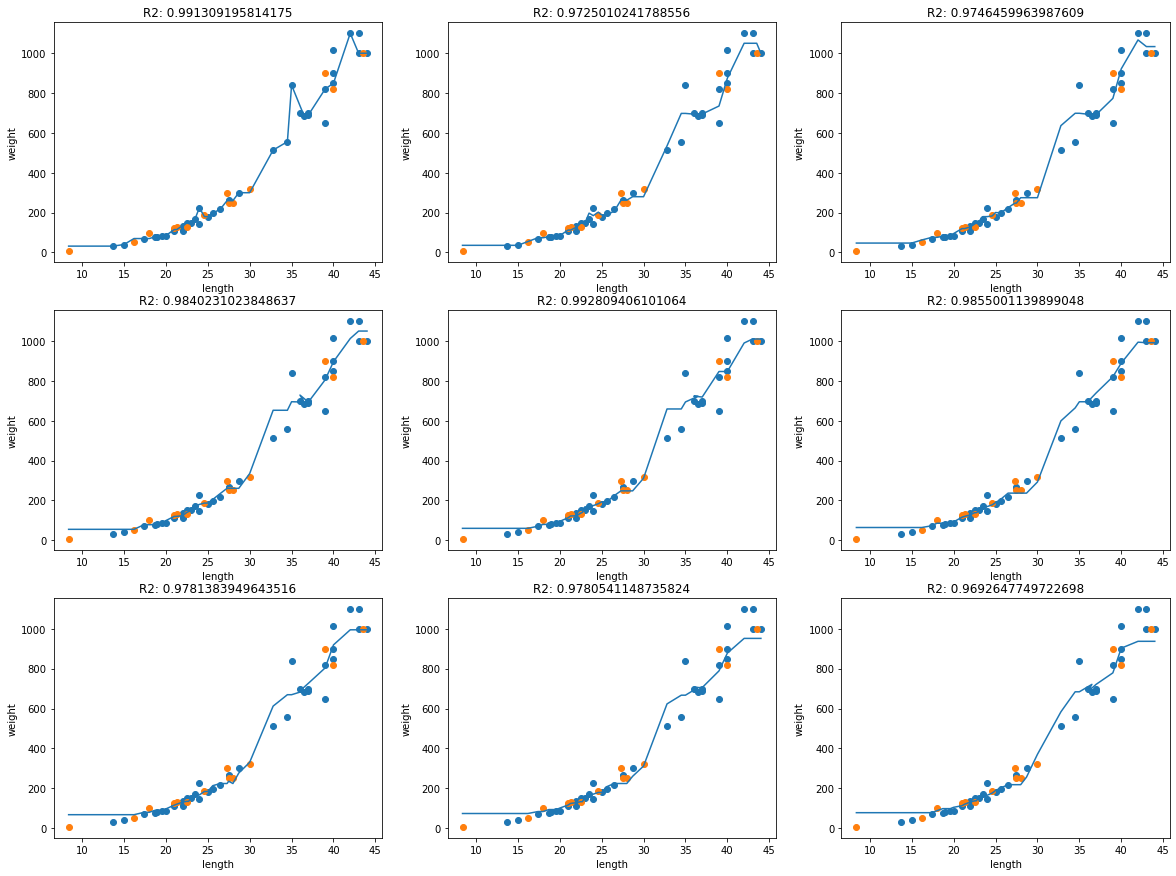

max_k = 5, max_score = 0.992809406101064


In [208]:
# 2차원 배열로 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

plt.figure(figsize=(20, 15))
max_score = 0
max_k = 0

# K를 1부터 9까지
for K in range(1,10):
  # K값에 따라 모델 학습
  knr = KNeighborsRegressor()
  knr.n_neighbors = K
  knr.fit(train_input, train_target)
  
  perch_length = perch_length.reshape(-1, 1)
  pred = knr.predict(perch_length)
  score = knr.score(test_input, test_target)
  if (max_score < score):
    max_k = K
    max_score = score

  # 데이터 시각화
  plt.subplot(3,3,K)
  plt.scatter(train_input, train_target)
  plt.scatter(test_input, test_target)
  plt.plot(perch_length, pred)
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.title("R2: " + str(score))
plt.show()
print(f"max_k = {max_k}, max_score = {max_score}")

### 결론
K = 5 일 때 0.992로 가장 높은 R2 수치를 나타냈습니다.  
K = 1 일 때도 0.991로 두번째로 높은 수치를 기록했으나, 그래프 모양을 보면 알 수 있듯이, 과적합되었을 가능성이 높습니다.  
따라서 최적의 K는 5임을 알 수 있습니다.


    [문제 2] kaggle등에서 관심 분야 데이터셋(csv파일)을 구해서 3가지 모델로 예측(회귀)을 하고 비교를 하시오

### 문제 정의
개발자들이 연봉을 얼마나 받는지 궁금했기 때문에 그에 따른 데이터셋을 조사했습니다.  

### 데이터 수집
https://www.kaggle.com/aitzaz/stack-overflow-developer-survey-2020  
- survey_results_public.csv(94.6 MB)  
- 위의 데이터는 Stack Overflow에서 2020년 진행한 설문조사로, 약 65000개의 데이터가 존재합니다.  

### 데이터 분석
많은 데이터중 필요한 데이터만 정리해봤습니다.  
- Age - 현재 나이
- ConvertedComp - 연봉 (달러)
- Gender - 성별 (Man, Woman) -> (0, 1)
- YearsCode - 코딩을 한 기간 (년)
  - Less than 1 year
  - 1 ~ 50
  - More than 50 years

### 데이터 정제

- csv 임포트
- Nan 제거
- YearsCode 'Less than 1 year'와 'More than 50 years' 숫자로 변경 (0, 51)
- Gender Man과 Woman으로 이분화

In [209]:
import pandas as pd
df = pd.read_csv('survey_results_public.csv')

# Nan 제거
df = df[['Age', 'Gender', 'YearsCode', 'ConvertedComp']].dropna()

# YearsCode 모두 숫자로 변경 (0, 51)
df['YearsCode'] = df['YearsCode'].replace(['Less than 1 year'], 0)
df['YearsCode'] = df['YearsCode'].replace(['More than 50 years'], 51)
df['YearsCode'] = pd.to_numeric(df['YearsCode'])

# Gender Man과 Woman으로 나눈 후 인덱스 초기화
df = df[(df['Gender'] == 'Man') | (df['Gender'] == 'Woman')].reset_index()

# Gender 인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['Gender'].unique())
gender_encoded = encoder.transform(df['Gender'])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=['Gender'])
df['Gender'] = gender_encoded
df

,index,Age,Gender,YearsCode,ConvertedComp
0,7,36.0,0,17,116000.0
1,9,22.0,0,8,32315.0
2,10,23.0,0,10,40070.0
3,11,49.0,0,7,14268.0
4,12,53.0,0,35,38916.0
...,...,...,...,...,...
29797,63083,25.0,0,10,45600.0
29798,63402,32.0,0,19,74500.0
29799,63517,33.0,1,20,59454.0
29800,63955,22.0,0,5,9612.0


    2.1 단순선형회귀

YearsCode와 ConvertedComp를 numpy 배열로 변경

In [210]:
year = df['YearsCode'].to_numpy()
comp = df['ConvertedComp'].to_numpy()
year

array([17,  8, 10, ..., 20,  5, 25])

Train Test 분리

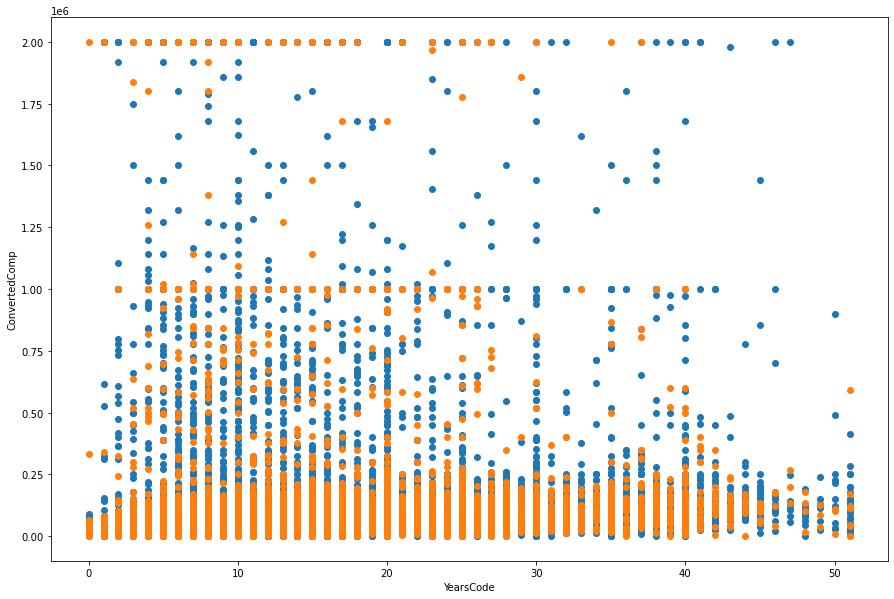

In [211]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(year, comp, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.xlabel('YearsCode')
plt.ylabel('ConvertedComp')
plt.show()

Linear 모델 적용

0.009187228262966585


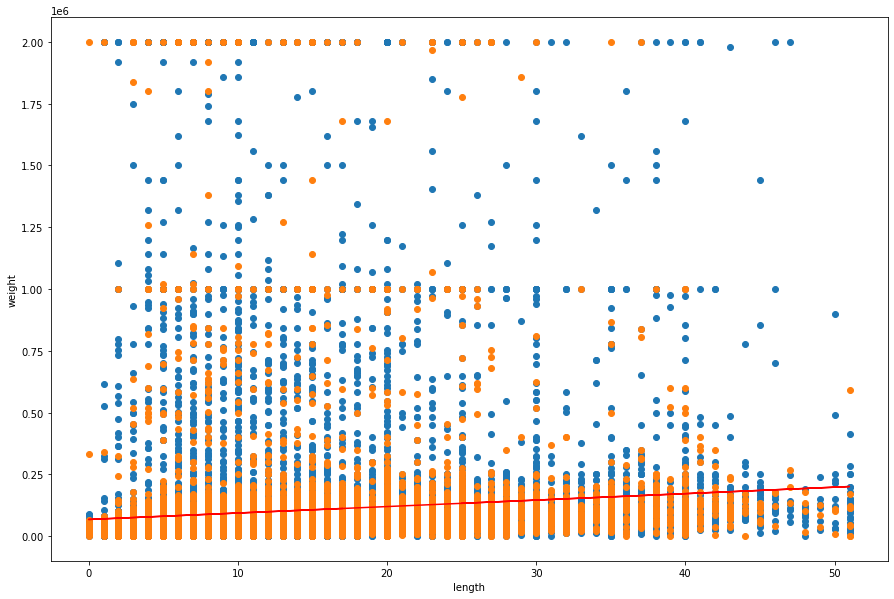

In [212]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

year = year.reshape(-1, 1)
pred = lr.predict(year)

print(lr.score(test_input, test_target))

plt.figure(figsize=(15, 10))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(year, pred, color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

    2.2 다항선형회귀

YearsCode와 ConvertedComp를 numpy 배열로 변경

In [213]:
year = df['YearsCode'].to_numpy()
comp = df['ConvertedComp'].to_numpy()
year

array([17,  8, 10, ..., 20,  5, 25])

Train Test 분리

In [214]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(year, comp, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_input

array([[20],
       [ 0],
       [ 9],
       ...,
       [39],
       [15],
       [ 5]])

2차 Linear 모델 적용

0.009730543365912392


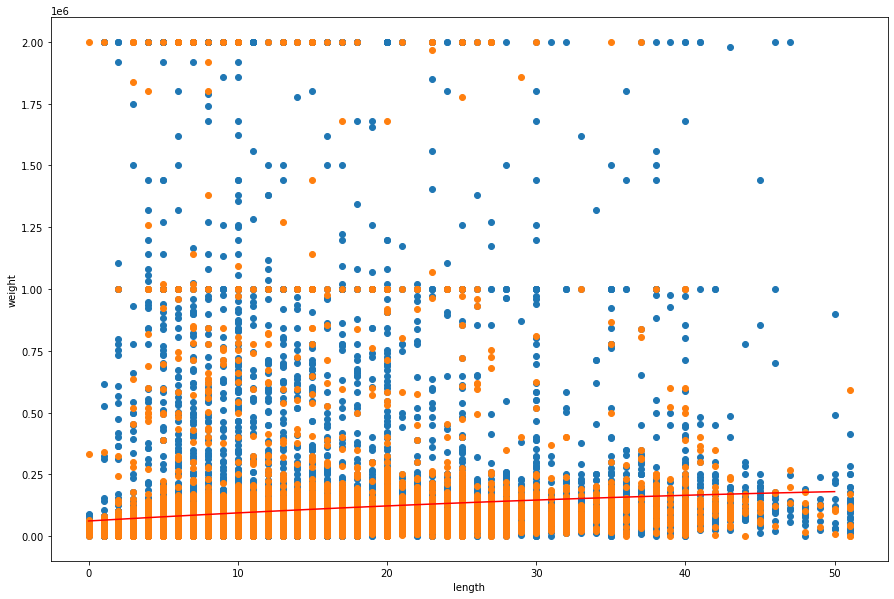

In [215]:
import matplotlib.pyplot as plt
import numpy as np

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

point = np.arange(0, 51)
print(lr.score(test_poly, test_target))

plt.figure(figsize=(15, 10))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_, color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

    2.3 다중선형회귀

Age, Gender, YearsCode와 ConvertedComp를 Numpy배열로 변경

In [216]:
full = df[['Age', 'Gender', 'YearsCode']].to_numpy()
comp = df['ConvertedComp'].to_numpy()
full

array([[36.,  0., 17.],
       [22.,  0.,  8.],
       [23.,  0., 10.],
       ...,
       [33.,  1., 20.],
       [22.,  0.,  5.],
       [41.,  0., 25.]])

Train Test 분리

In [217]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(full, comp, random_state=42)
train_input

array([[40.,  0., 20.],
       [39.,  0.,  0.],
       [24.,  0.,  9.],
       ...,
       [47.,  0., 39.],
       [31.,  0., 15.],
       [24.,  0.,  5.]])

2차 Linear 모델 적용

In [218]:
from sklearn.linear_model import LinearRegression

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(test_poly, test_target))

0.011162996184310048


    2.4 모델 비교

단순 선형 회귀를 사용했을 때의 R2값 : 0.009187228262966585  
다항(2차) 선형 회귀를 사용했을 때의 R2값 : 0.009730543365912392  
다중 선형 회귀를 사용했을 때의 R2값 : 0.011162996184310048  

위의 결과로 봤을 때 확실히 R2값이 증가하는 것을 확인할수는 있었지만  
절대적인 수치가 매우 낮았습니다.  
이를 통해 나이, 성별, 총 코딩을 접한 년도 라는 특징(feature)들이 결과값과  
그리 연관성이 없었음을 알 수 있었습니다.  
하지만 단순-다항-다중 선형 회귀 모델을 거쳐옴으로써 유효한 데이터가 많을수록  
결과값을 예측하기 더 수월하다는 것을 알 수 있었습니다.  

원래 하려고 했던 모델의 학습은 선형 모델보다는 KNN이 더욱 접합할 것 같아  
아래에서 KNN도 사용해보았습니다.  
하지만.. 결과는 별 차이가 없었습니다..ㅠㅠ  

1부터 500사이의 최적은 K값 찾기

In [219]:
from sklearn.neighbors import KNeighborsRegressor

max_score = 0
max_k = 0

# K를 1부터 9까지
for K in range(1,500):
  # K값에 따라 모델 학습
  knr = KNeighborsRegressor()
  knr.n_neighbors = K
  knr.fit(train_poly, train_target)
  
  score = knr.score(test_poly, test_target)
  print(score)
  if (max_score < score):
    max_k = K
    max_score = score

print(f"max_k = {max_k}, max_score = {max_score}")

-1.026962932482184
-0.5604900297230941
-0.32591319003086583
-0.3464303109635296
-0.24640609901064603
-0.20057867712646904
-0.16907443921047371
-0.14307739997762892
-0.1183374468693017
-0.11167878494989147
-0.10226288877450829
-0.09125090887678344
-0.08560388205167335
-0.07402912875074663
-0.07022665342361845
-0.061350158235619734
-0.06427830347161323
-0.060630170321346766
-0.053757696748514494
-0.05491088867441163
-0.05032445584912737
-0.048644765188228245
-0.04509289156034946
-0.044176117819775707
-0.042012066299736084
-0.040495688753054315
-0.03795790727232662
-0.035476414667859446
-0.036260190440486895
-0.03613021857474208
-0.03393285773101695
-0.034071491105783114
-0.032634997409145106
-0.0309184202815056
-0.029837179768920974
-0.028772088915456795
-0.026152010350362298
-0.024432089952985958
-0.023840568648703542
-0.022498130841249964
-0.020991620761940943
-0.022867998647557286
-0.024579774531815257
-0.023495848200182357
-0.02187142385702545
-0.020800988389613195
-0.020694664010717

최적값으로 나온 303사용하여 예측

In [222]:
from sklearn.neighbors import KNeighborsRegressor

K = 303

# K값에 따라 모델 학습
knr = KNeighborsRegressor()
knr.n_neighbors = K
knr.fit(train_poly, train_target)

score = knr.score(test_poly, test_target)
print(score)

user = np.array([[24,0,3]])
user_poly = np.column_stack((user ** 2, user))
print(user_poly)
print(knr.predict(user_poly))

0.0129722883041955
[[576   0   9  24   0   3]]
[77506.70957096]
